In [454]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [455]:
import sys
import cv2
import torch
import pydicom
import numpy as np
import matplotlib.pyplot as plt

from segment_anything import sam_model_registry, SamPredictor

sys.path.append("..")

In [456]:
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
predictor = SamPredictor(sam)

In [457]:
dcm_path = '../data/0121546/1st/FILE0026.dcm'
dcm_data = pydicom.read_file(dcm_path)
img = dcm_data.pixel_array

In [458]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=50):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=0.5)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=0.5)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

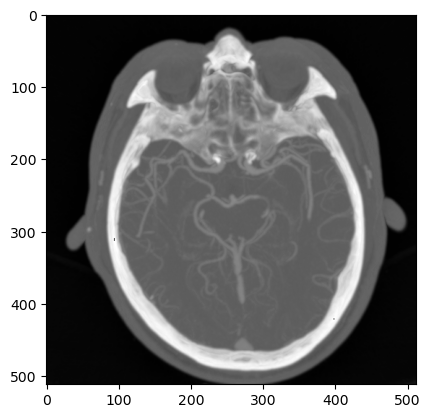

In [459]:
dcm_data = pydicom.read_file(dcm_path)
img = dcm_data.pixel_array

def min_max_scaling(img):
    img = img / (img.max() - img.min())
    return img

img = min_max_scaling(img) *256
img = np.ceil(img).astype((np.uint8))

plt.imshow(img, cmap='gray')
plt.show()

image = np.expand_dims(img, axis=2)
image = np.repeat(image, 3, axis=2)
predictor.set_image(image)

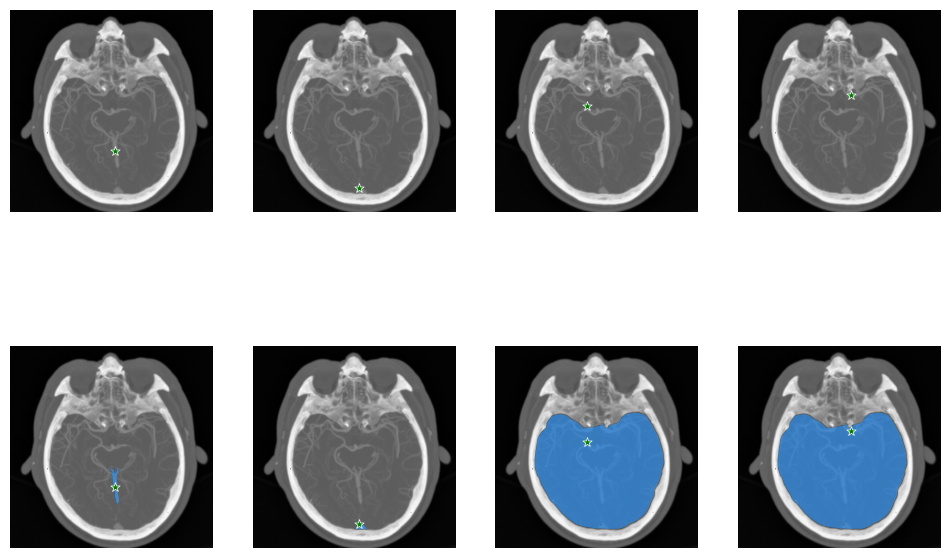

In [460]:
input_point1 = np.array([[265, 356]])
input_point2 = np.array([[270, 450]])
input_point3 = np.array([[231, 242]])
input_point4 = np.array([[285, 215]])
input_label = np.array([1])

masks1, _, _ = predictor.predict(point_coords=input_point1, point_labels=input_label, multimask_output=True,)
masks2, _, _ = predictor.predict(point_coords=input_point2, point_labels=input_label,multimask_output=True,)
masks3, _, _ = predictor.predict(point_coords=input_point3, point_labels=input_label, multimask_output=True,)
masks4, _, _ = predictor.predict(point_coords=input_point3, point_labels=input_label, multimask_output=True,)

plt.figure(figsize=(12,8))

plt.subplot(241)
plt.imshow(image)
show_points(input_point1, input_label, plt.gca())
plt.axis(False)
plt.subplot(245)
plt.imshow(image)
show_mask(masks1[0], plt.gca())
show_points(input_point1, input_label, plt.gca())
plt.axis(False)

plt.subplot(242)
plt.imshow(image)
show_points(input_point2, input_label, plt.gca())
plt.axis(False)
plt.subplot(246)
plt.imshow(image)
show_mask(masks2[0], plt.gca())
show_points(input_point2, input_label, plt.gca())
plt.axis(False)

plt.subplot(243)
plt.imshow(image)
show_points(input_point3, input_label, plt.gca())
plt.axis(False)
plt.subplot(247)
plt.imshow(image)
show_mask(masks3[0], plt.gca())
show_points(input_point3, input_label, plt.gca())
plt.axis(False)

plt.subplot(244)
plt.imshow(image)
show_points(input_point4, input_label, plt.gca())
plt.axis(False)
plt.subplot(248)
plt.imshow(image)
show_mask(masks4[0], plt.gca())
show_points(input_point4, input_label, plt.gca())
plt.axis(False)

plt.show() 

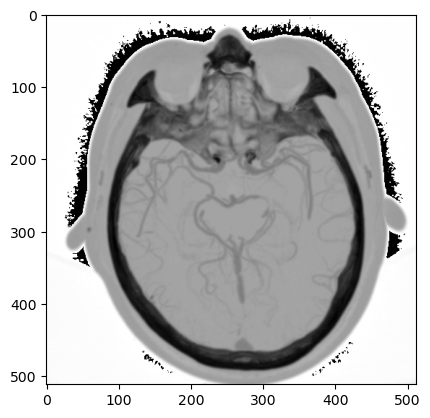

In [461]:
dcm_data = pydicom.read_file(dcm_path)
img = dcm_data.pixel_array

def min_max_scaling(img):
    img = img / (img.max() - img.min())
    return img

img = min_max_scaling(img)*256
img = np.ceil(img).astype((np.uint8))
img = (img - img.min())*255/(img.max()-img.min())*256
img = np.ceil(img).astype((np.uint8))

plt.imshow(img, cmap='gray')
plt.show()

image = np.expand_dims(img, axis=2)
image = np.repeat(image, 3, axis=2)
predictor.set_image(image)

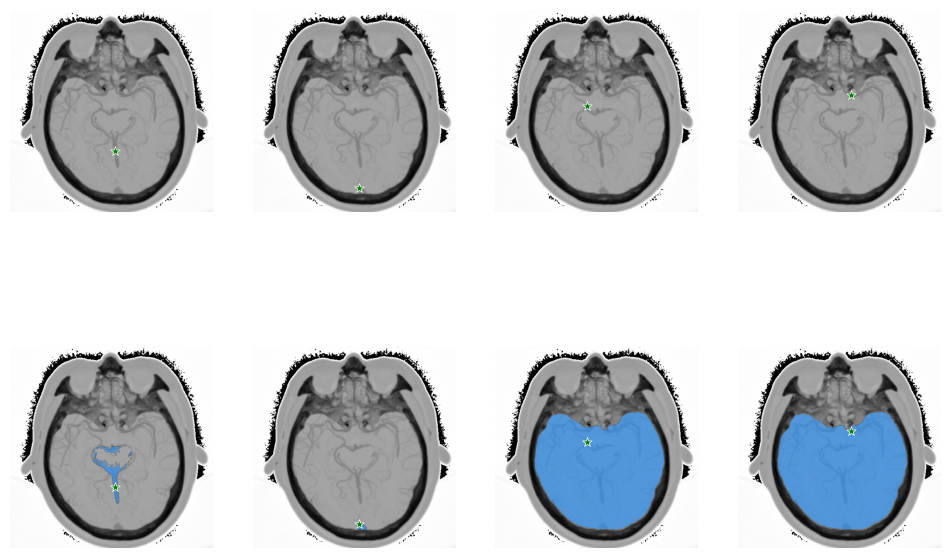

In [462]:
input_point1 = np.array([[265, 356]])
input_point2 = np.array([[270, 450]])
input_point3 = np.array([[231, 242]])
input_point4 = np.array([[285, 215]])
input_label = np.array([1])

masks1, _, _ = predictor.predict(point_coords=input_point1, point_labels=input_label, multimask_output=True,)
masks2, _, _ = predictor.predict(point_coords=input_point2, point_labels=input_label,multimask_output=True,)
masks3, _, _ = predictor.predict(point_coords=input_point3, point_labels=input_label, multimask_output=True,)
masks4, _, _ = predictor.predict(point_coords=input_point3, point_labels=input_label, multimask_output=True,)

plt.figure(figsize=(12,8))

plt.subplot(241)
plt.imshow(image)
show_points(input_point1, input_label, plt.gca())
plt.axis(False)
plt.subplot(245)
plt.imshow(image)
show_mask(masks1[0], plt.gca())
show_points(input_point1, input_label, plt.gca())
plt.axis(False)

plt.subplot(242)
plt.imshow(image)
show_points(input_point2, input_label, plt.gca())
plt.axis(False)
plt.subplot(246)
plt.imshow(image)
show_mask(masks2[0], plt.gca())
show_points(input_point2, input_label, plt.gca())
plt.axis(False)

plt.subplot(243)
plt.imshow(image)
show_points(input_point3, input_label, plt.gca())
plt.axis(False)
plt.subplot(247)
plt.imshow(image)
show_mask(masks3[0], plt.gca())
show_points(input_point3, input_label, plt.gca())
plt.axis(False)

plt.subplot(244)
plt.imshow(image)
show_points(input_point4, input_label, plt.gca())
plt.axis(False)
plt.subplot(248)
plt.imshow(image)
show_mask(masks4[0], plt.gca())
show_points(input_point4, input_label, plt.gca())
plt.axis(False)

plt.show() 

C:\Users\User\AppData\Local\Temp\ipykernel_12316\2183658894.py:14: RuntimeWarning: divide by zero encountered in log
  img_2st = -np.log(min_max_scaling(img_2st))
C:\Users\User\AppData\Local\Temp\ipykernel_12316\2183658894.py:15: RuntimeWarning: divide by zero encountered in log
  img_3st = -np.log(min_max_scaling(img_3st))


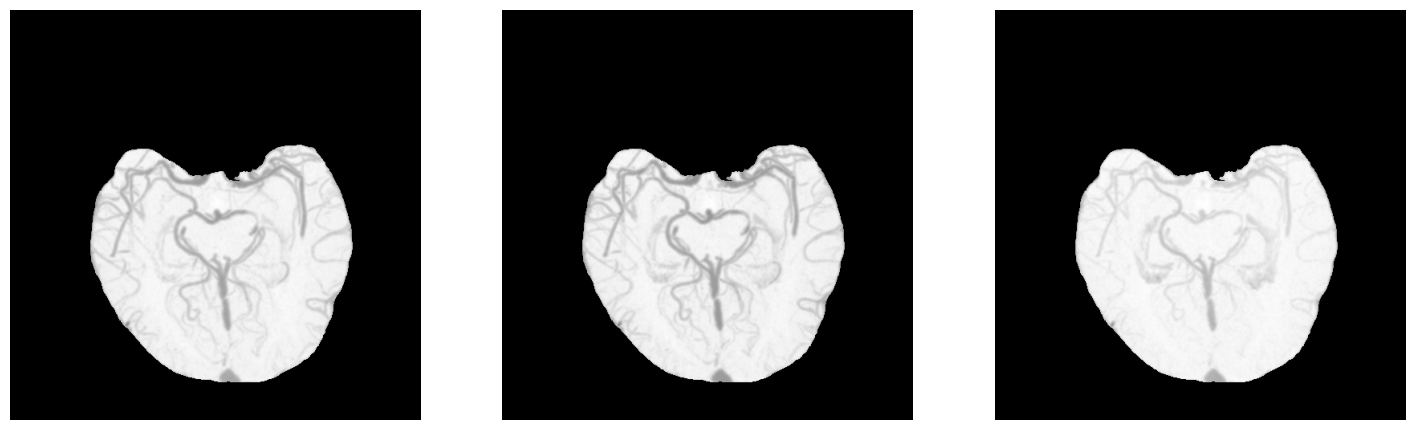

In [467]:
dcm_path_1st = '../data/0121546/1st/FILE0026.dcm'
dcm_path_2st = '../data/0121546/2st/FILE0026.dcm'
dcm_path_3st = '../data/0121546/3st/FILE0026.dcm'

dcm_data_1st = pydicom.read_file(dcm_path_1st)
dcm_data_2st = pydicom.read_file(dcm_path_2st)
dcm_data_3st = pydicom.read_file(dcm_path_3st)

img_1st = dcm_data_1st.pixel_array
img_2st = dcm_data_2st.pixel_array
img_3st = dcm_data_3st.pixel_array

img_1st = -np.log(min_max_scaling(img_1st))
img_2st = -np.log(min_max_scaling(img_2st))
img_3st = -np.log(min_max_scaling(img_3st))

img_1st[masks4[0]==False]=0
img_2st[masks4[0]==False]=0
img_3st[masks4[0]==False]=0

plt.figure(figsize=(18,6))
plt.subplot(131)
plt.imshow(img_1st, cmap='gray')
plt.axis(False)
plt.subplot(132)
plt.imshow(img_2st, cmap='gray')
plt.axis(False)
plt.subplot(133)
plt.imshow(img_3st, cmap='gray')
plt.axis(False)
plt.show()

(-0.5, 511.5, 511.5, -0.5)

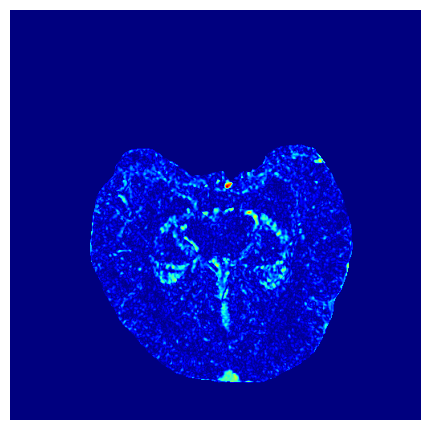

In [479]:
imga = img_1st-img_2st
imga = np.abs(imga)

plt.figure(figsize=(18,6))
plt.subplot(131)
plt.imshow(imga, cmap='jet')
plt.axis(False)

(-0.5, 511.5, 511.5, -0.5)

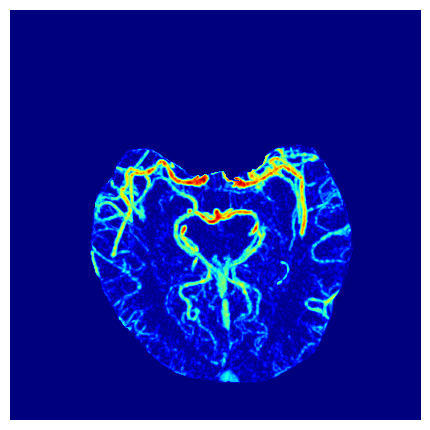

In [480]:
imga = img_2st-img_3st
imga = np.abs(imga)

plt.figure(figsize=(18,6))
plt.subplot(131)
plt.imshow(imga, cmap='jet')
plt.axis(False)